In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
pd.set_option("display.max_columns", None, "display.width", 1000)

# EDA - projekt 1

**Mikołaj Spytek**
**Artur Żółkowski**

Zajmujemy się zbiorem danych, dotyczącym uczniów dwóch szkół średnich w Portugalii. Dane pochodzą zarówno z odpowiedzi udzielonych bezpośrednio przez uczniów (dane dotyczące sytuacji społecznej, ekonomicznej itd.) oraz z informacji przechowywyanych przez szkołę (dane dotyczące m. in. ocen).

Zmienną wyjaśnianą jest `G3` - ocena roczna. Pozostałe zmienne - w znaczej większości kategoryczne, to zmienne wyjaśniające. 

In [2]:
r = requests.get('https://api.apispreadsheets.com/api/dataset/school-grades/')
data = r.json()
df = pd.DataFrame(data['data'])

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

Patrząc na opis zbioru danych, możemy zauważyć, że w ramce nie występują wartości puste. Widać również, że cały zbiór danych składa się z 649 obserwacji. Dla zmiennych faktycznie numerycznych, warto spojrzeć na statystyki opisowe. Dla pozostałych kolumn, nie ma to zbyt dużego sensu, gdyż 

In [4]:
df[["age", "failures", "absences", "G1","G2","G3"]].describe()

,age,failures,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,0.221880,3.659476,11.399076,11.570108,11.906009
std,1.218138,0.593235,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,0.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,0.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,3.000000,32.000000,19.000000,19.000000,19.000000


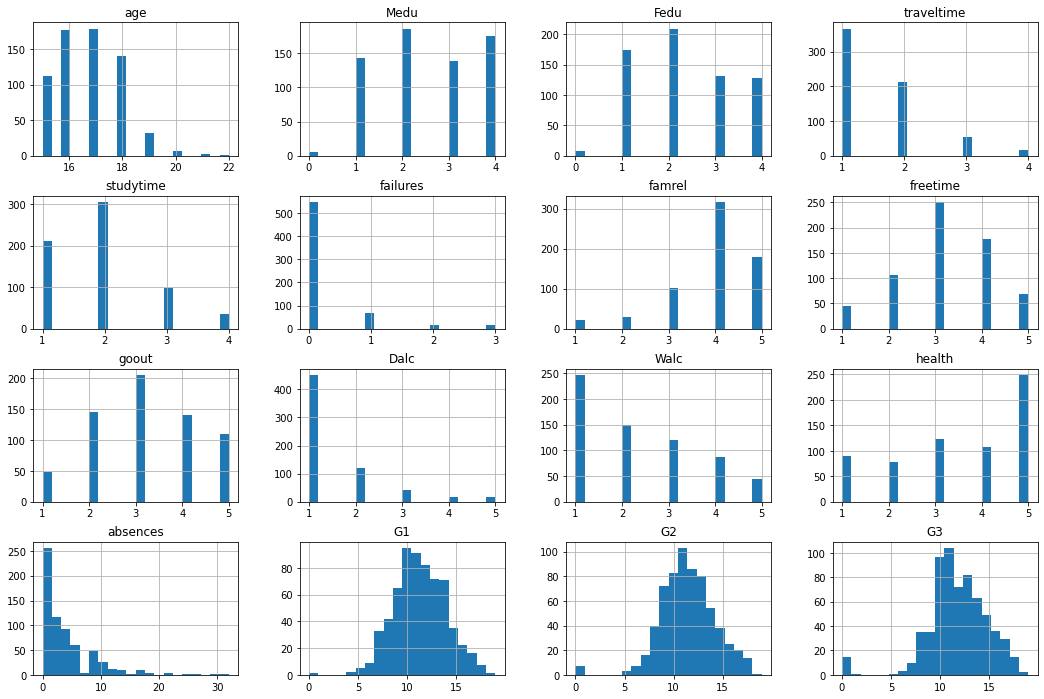

In [5]:
df.hist(bins=20, figsize=(18,12))
plt.show()

Dane mamy z dwóch szkół, więc warto zbadać, czy klasy są zbalansowane.

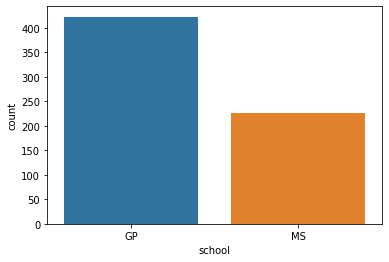

In [6]:
sns.countplot(data=df, x="school")
plt.show()

Niestety nie są - musimy to wziąć pod uwagę przy podziale na zbiór testowy i walidacyjny - ocenianie między szkołami może się różnic.

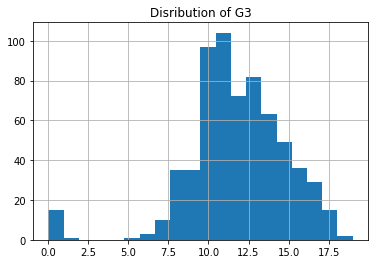

In [7]:
df["G3"].hist(bins=20)
plt.title("Disribution of G3")
plt.show()

Widzimy, że oceny końcowe miałyby rozkład podobny do normalnego, gdyby nie osoby z oceną 0 - powoduje to jednak, że mamy do czynienia z ujemną skośnością.

Ciekawa rzecz pokazuje się nam, gdy spojrzymy na zmienną `G2` i jej korelację ze zmienną wyjaśnianą: 

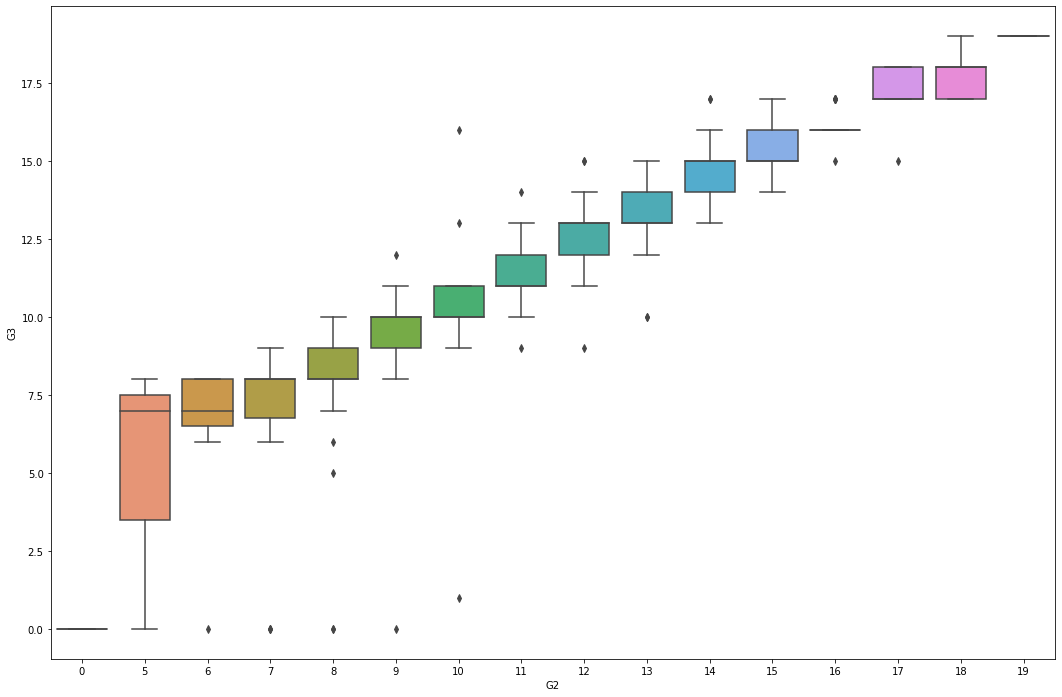

In [8]:
plt.figure(figsize=(18, 12))
sns.boxplot(data=df, x="G2", y="G3")
plt.show()

Jak zauważyli autorzy zbioru danych zmienne `G1` i `G2` są bardzo silnie skorelowane z naszą zmienną wyjaśnianą. Jednak użycie ich do predykowania `G3` jest mało przydatne, bo są to oceny z poprzednich semestrów. Dużo ciekawiej jest wytrenować model na pozostałych kolumnach. 

Poniżej przyjrzymy się kilku zmiennym, które według naszej intuicji mogłyby mieć większy wpływ na ocenę końcową.

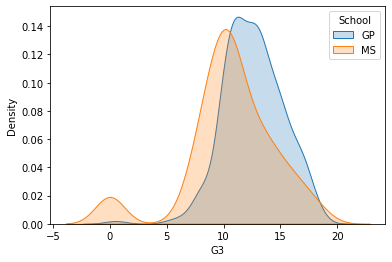

In [9]:
# różnica między tymi dwiema szkołami

sns.kdeplot(data=df.loc[df["school"]=="GP", "G3"], shade="True", legend=True, label = "GP")
sns.kdeplot(data=df.loc[df["school"]=="MS", "G3"], shade="True", legend=True, label = "MS")
plt.legend(title="School")

plt.show()

Już z pierwszego wykresu gęstości widzimy, że uczniowie szkoły `GP` uzyskują trochę lepsze oceny.

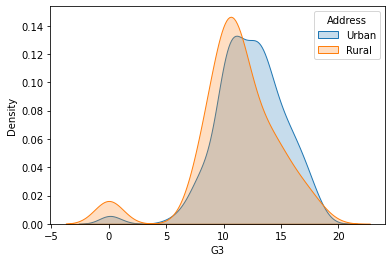

In [10]:
# miasto/wieś

sns.kdeplot(data=df.loc[df["address"]=="U", "G3"], shade="True", legend=True, label = "Urban")
sns.kdeplot(data=df.loc[df["address"]=="R", "G3"], shade="True", legend=True, label = "Rural")
plt.legend(title="Address")
plt.show()

Na kolejnym wykresie widzimy, że uczniowie mieszkający w mieście mają trochę większą średnią ocenę, ale również nieco większą wariancję.

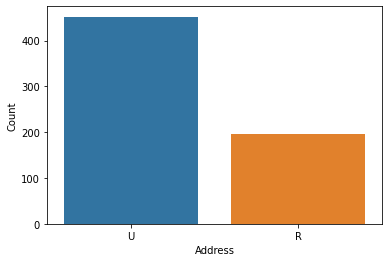

In [11]:
plot = sns.countplot(x=df['address'])
plot.set_xlabel('Address')
plot.set_ylabel('Count')
plt.show()

Przy okazji sprawdziliśmy, jaka jest proporcja uczniów mieszkających w różnych miejscach - również nie mamy zbalansowanych kateogrii.

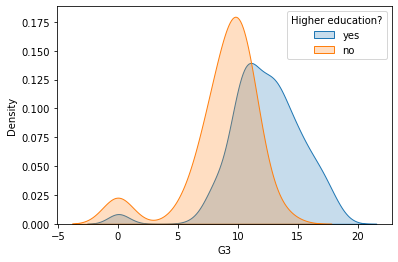

In [12]:
# czy zamierzają się jeszcze uczyć

sns.kdeplot(data=df.loc[df["higher"]=="yes", "G3"], shade="True", legend=True, label = "yes")
sns.kdeplot(data=df.loc[df["higher"]=="no", "G3"], shade="True", legend=True, label = "no")
plt.legend(title="Higher education?")

plt.show()

Zmienną, na której bardzo widać różnice w końcowej ocenie jest chęć podjęcia dalszej edukacji po szkole średniej. 

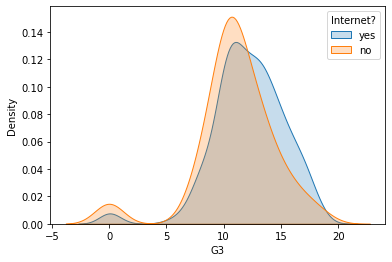

In [13]:
# dostęp do internetu

sns.kdeplot(data=df.loc[df["internet"]=="yes", "G3"], shade="True", legend=True, label = "yes")
sns.kdeplot(data=df.loc[df["internet"]=="no", "G3"], shade="True", legend=True, label = "no")
plt.legend(title="Internet?")
plt.show()

Dostęp do internetu również wpływa na rozkład ocen końcowych - nieznacznie, ale jednak.

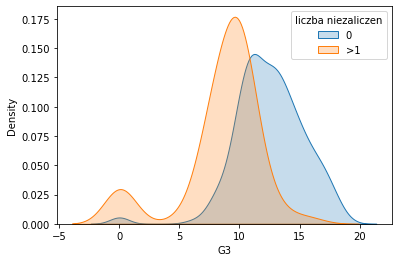

In [14]:
#niezaliczenia

sns.kdeplot(data=df.loc[df["failures"]==0, "G3"], shade="True", label="0")
sns.kdeplot(data=df.loc[df["failures"]>=1, "G3"], shade="True", label=">1")
plt.legend(title="liczba niezaliczen")

plt.show()

Znaczny wpływ ma zmienna określająca ile razy dany uczeń nie zaliczył kursu. Uczniowie, którzy nie zdali, mają średnio znacznie gorsze oceny.

Następne kilka wykresów jest według nas bardzo ciekawe. Zarówno płeć, jak i to, że dana osoba jest w związku nie ma dużego wpływu na rozkład ocen. Jednak jeśli popatrzymy na te zmienne razem to zmiany stają się bardziej zauważalne. Dodatkowo trend nie jest taki sam a odwraca się. 

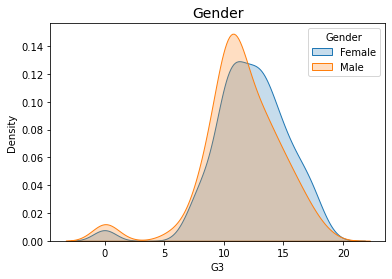

In [15]:
sns.kdeplot(df.loc[df['sex'] == 'F', 'G3'], label='Female', shade = True)
sns.kdeplot(df.loc[df['sex'] == 'M', 'G3'], label='Male', shade = True)
plt.title('Gender', fontsize = 14)
plt.legend(title="Gender")
plt.show()

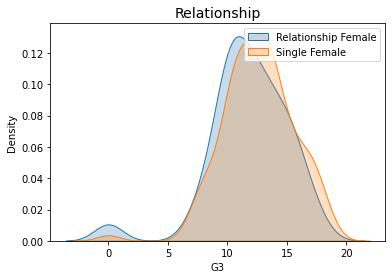

In [16]:
sns.kdeplot(df.loc[(df['romantic'] == 'yes') & (df['sex'] == 'F'), 'G3'], label='Relationship Female', shade = True)
sns.kdeplot(df.loc[(df['romantic'] == 'no') & (df['sex'] == 'F'), 'G3'], label='Single Female', shade = True)
plt.title('Relationship', fontsize = 14)
plt.legend()
plt.show()

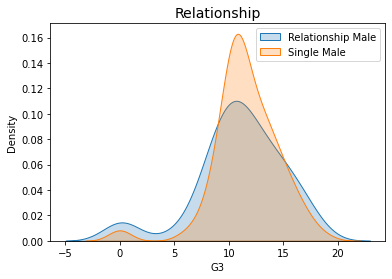

In [17]:
sns.kdeplot(df.loc[(df['romantic'] == 'yes') & (df['sex'] == 'M'), 'G3'], label='Relationship Male', shade = True)
sns.kdeplot(df.loc[(df['romantic'] == 'no') & (df['sex'] == 'M'), 'G3'], label='Single Male', shade = True)
plt.title('Relationship', fontsize = 14)
plt.legend()
plt.show()

Widać też, że edukacja rodziców w pewien sposób koreluje z oceną końcową dziecka.

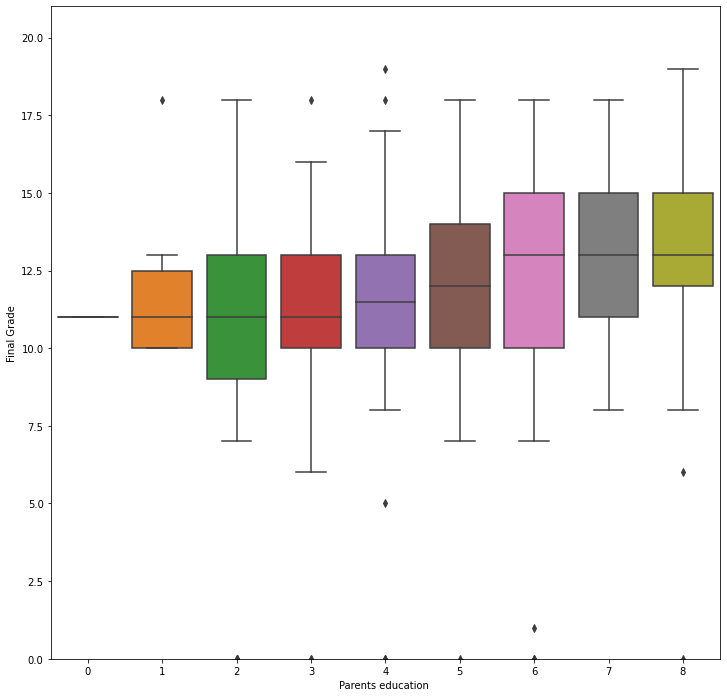

In [18]:
family_ed = df['Fedu'] + df['Medu'] 

plt.figure(figsize=(12,12))
b = sns.boxplot(x=family_ed,y=df['G3'])
b.set_xlabel('Parents education ')
b.set_ylabel('Final Grade')
b.set_ylim((0,21))
plt.show()

Na heatmapie sprawdziliśmy korelacje poszczególnych zmiennych. Zauważyliśmy jednak, że niektórych kolumn nie ma.

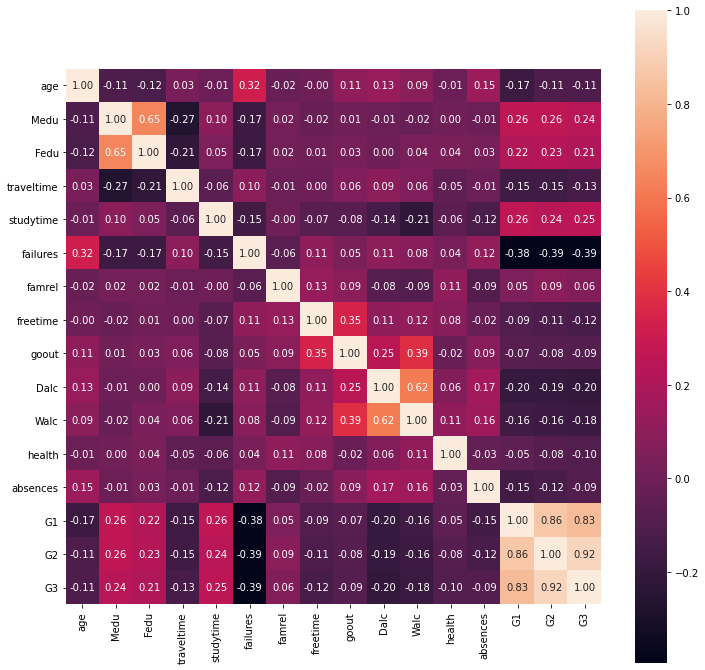

In [19]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True, fmt=".2f", square=True)
plt.show()

Okazało się, że niektóre zmienne kategoryczne były zapisane w kolumnach tekstowych - musieliśmy je przekonwertować, aby pokazały się na heatmapie.

In [20]:
df_all = df.copy()

for col in df_all.columns:
    if str(df_all[col].dtype) != "int64":
        df_all[col]=df_all[col].astype("category")
        df_all[col]=df_all[col].cat.codes

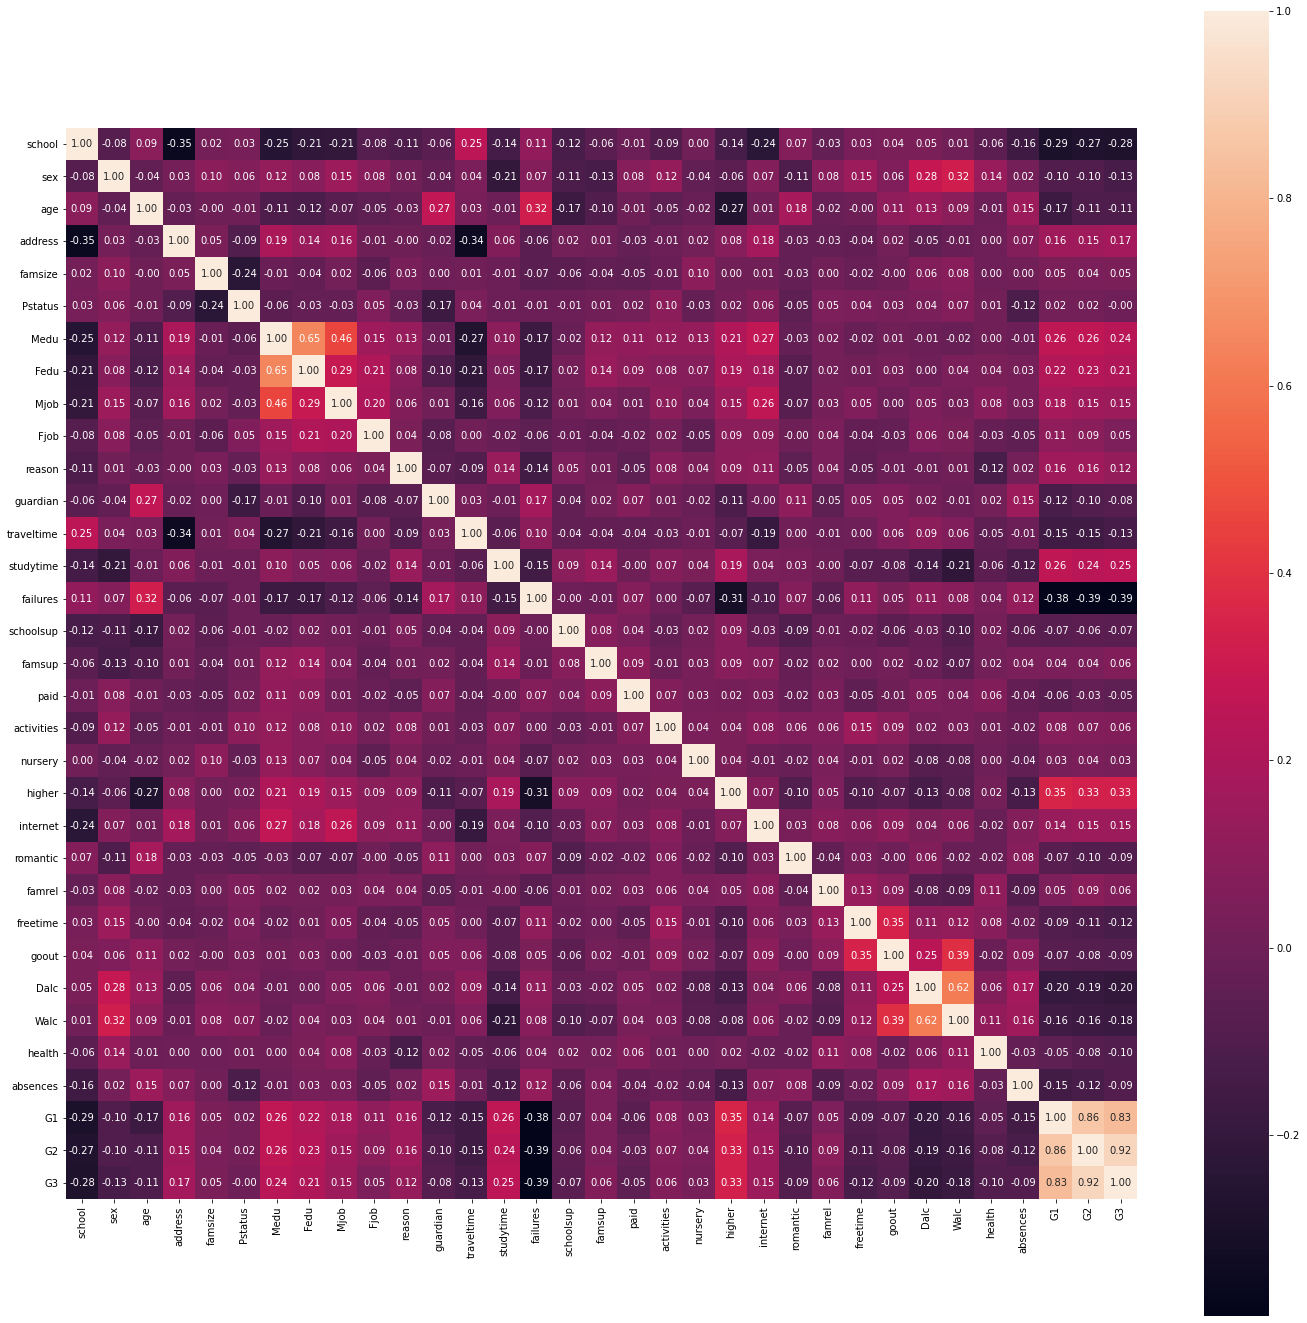

In [21]:
plt.figure(figsize=(24,24))
sns.heatmap(df_all.corr(),annot=True, fmt=".2f", square=True)
plt.show()

Heatmapa posłuży przede wszystkim do sprawdzenia, czy do modelu nie używamy dwóch silnie skorelowanych zmiennych. Jednak ciekawie jest też popatrzeć na niektóre zależności i sprawdzać czy zachodzą logiczne związki. 
Na przykład:
- zmienna `Walc` wykazuje dość silny związek z `Dalc` (spożycie alkoholu w tygodniu, ze spożyciem alkoholu w dni powszednie),
- adres ze szkołą - do jednej ze szkół chodziło więcej uczniów z miasta,
- liczba niezaliczeń z chęcią dalszej edukacji,
- czas dojazdu z adresem

Ponadto widzimy, że trzy ostanie wiersze prawie się od siebie nie różnią. Potwierdza się założenie autorów zbioru - nie ma sensu przewidywać na podstawie `G1` i `G2` bo to prawie identyczne zmienne.

Aby lepiej poznać rozkłady poszczególnych zmiennych i ich wpływ na zmienną wyjaśnianą, przygotowaliśmy wykresy skrzypcowe. Ponieważ większość ciekawszych wniosków przedstawiliśmy powyżej, poniżej zostawiliśmy tylko niektóre wykresy

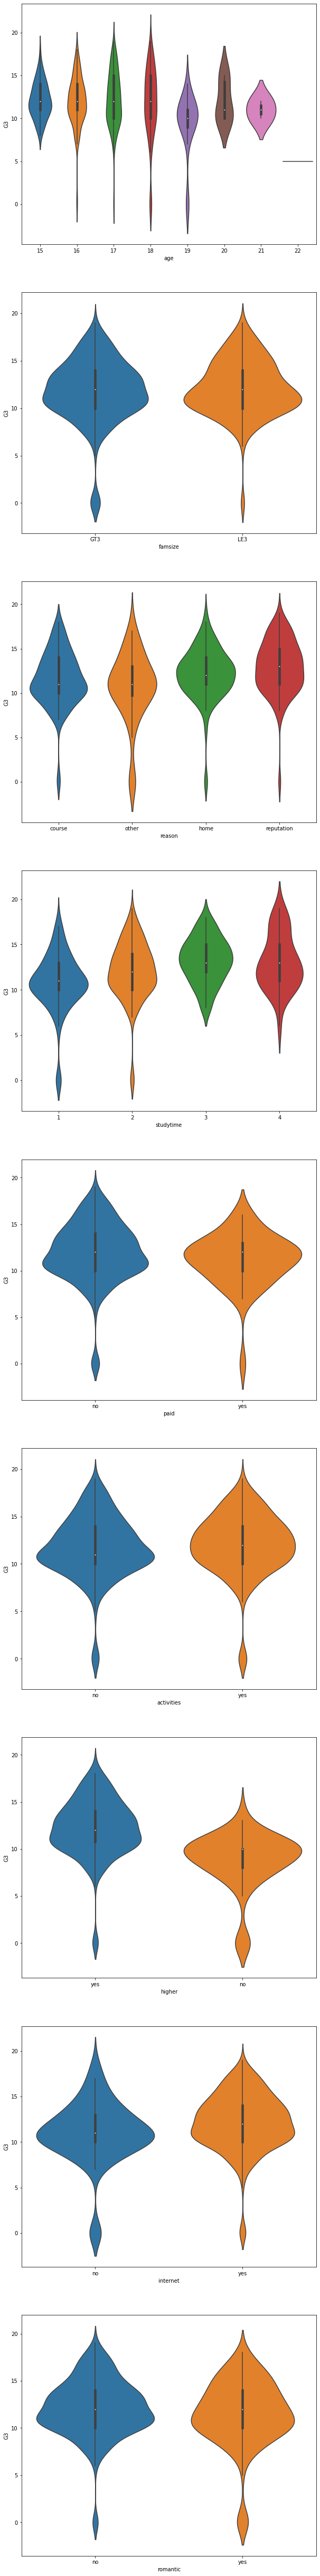

In [22]:
# fig, axs = plt.subplots(32, 1, figsize=(10, 300))

# for i in range(32):
#     sns.violinplot(data=df, x=df.columns.values[i], y="G3", ax=axs[i])


fig, axs = plt.subplots(9, 1, figsize=(10, 89))
counter=0
for i in [2, 4, 10, 13, 17, 18, 20, 21, 22]:
    sns.violinplot(data=df, x=df.columns.values[i], y="G3", ax=axs[counter])
    counter+=1